## Install relevant packages

In [8]:
pip install cmake==3.25.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 7.1 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: cmake
    Found existing installation: cmake 3.30.0
    Uninstalling cmake-3.30.0:
      Successfully uninstalled cmake-3.30.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install dlib==19.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp39-cp39-macosx_14_0_x86_64.whl size=3585913 sha256=a9c4b3da6e0c3f860a5c3028861275b98d9ffc7fd3b9986317694baf3a6dae52
  Stored in directory: /Users/allisonking/Library/Caches/pip/wheels/f7/ae/0e/3478eae12f6aed0e3d4880147ca855ba5d58f2e1098c73ab5f
Successfully built dlib
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade pip

  Using cached pip-24.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip --no-cache-dir install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 107.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=be50f2c1c1b90fba27a6d0b1f95c0424aa926fe8d6cb853fe341a125d93b5af5
  Stored in directory: /private/var/folders/p4/t3_t8f5j5jlf5jbpwllrd6hh0000gn/T/pip-ephem-wheel-cache-u0tch7bn/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models
Note: you may need to restart the kernel to use updated packages.


## Time for the fun to start

### Overview

Woohoo!! The point of this small exercise was to familiarize myself with how to do facial recoginition in Python. Throughout the below notebook, I built a face recognition system with the help of the face recognition library from the dlib package. Note: The images I used below for this example were from an MIT facial recoginition database (https://web.mit.edu/emeyers/www/face_databases.html). 

In [2]:
import cv2
import numpy as np
import face_recognition
from IPython.display import Image

## Main Image Used To Train:

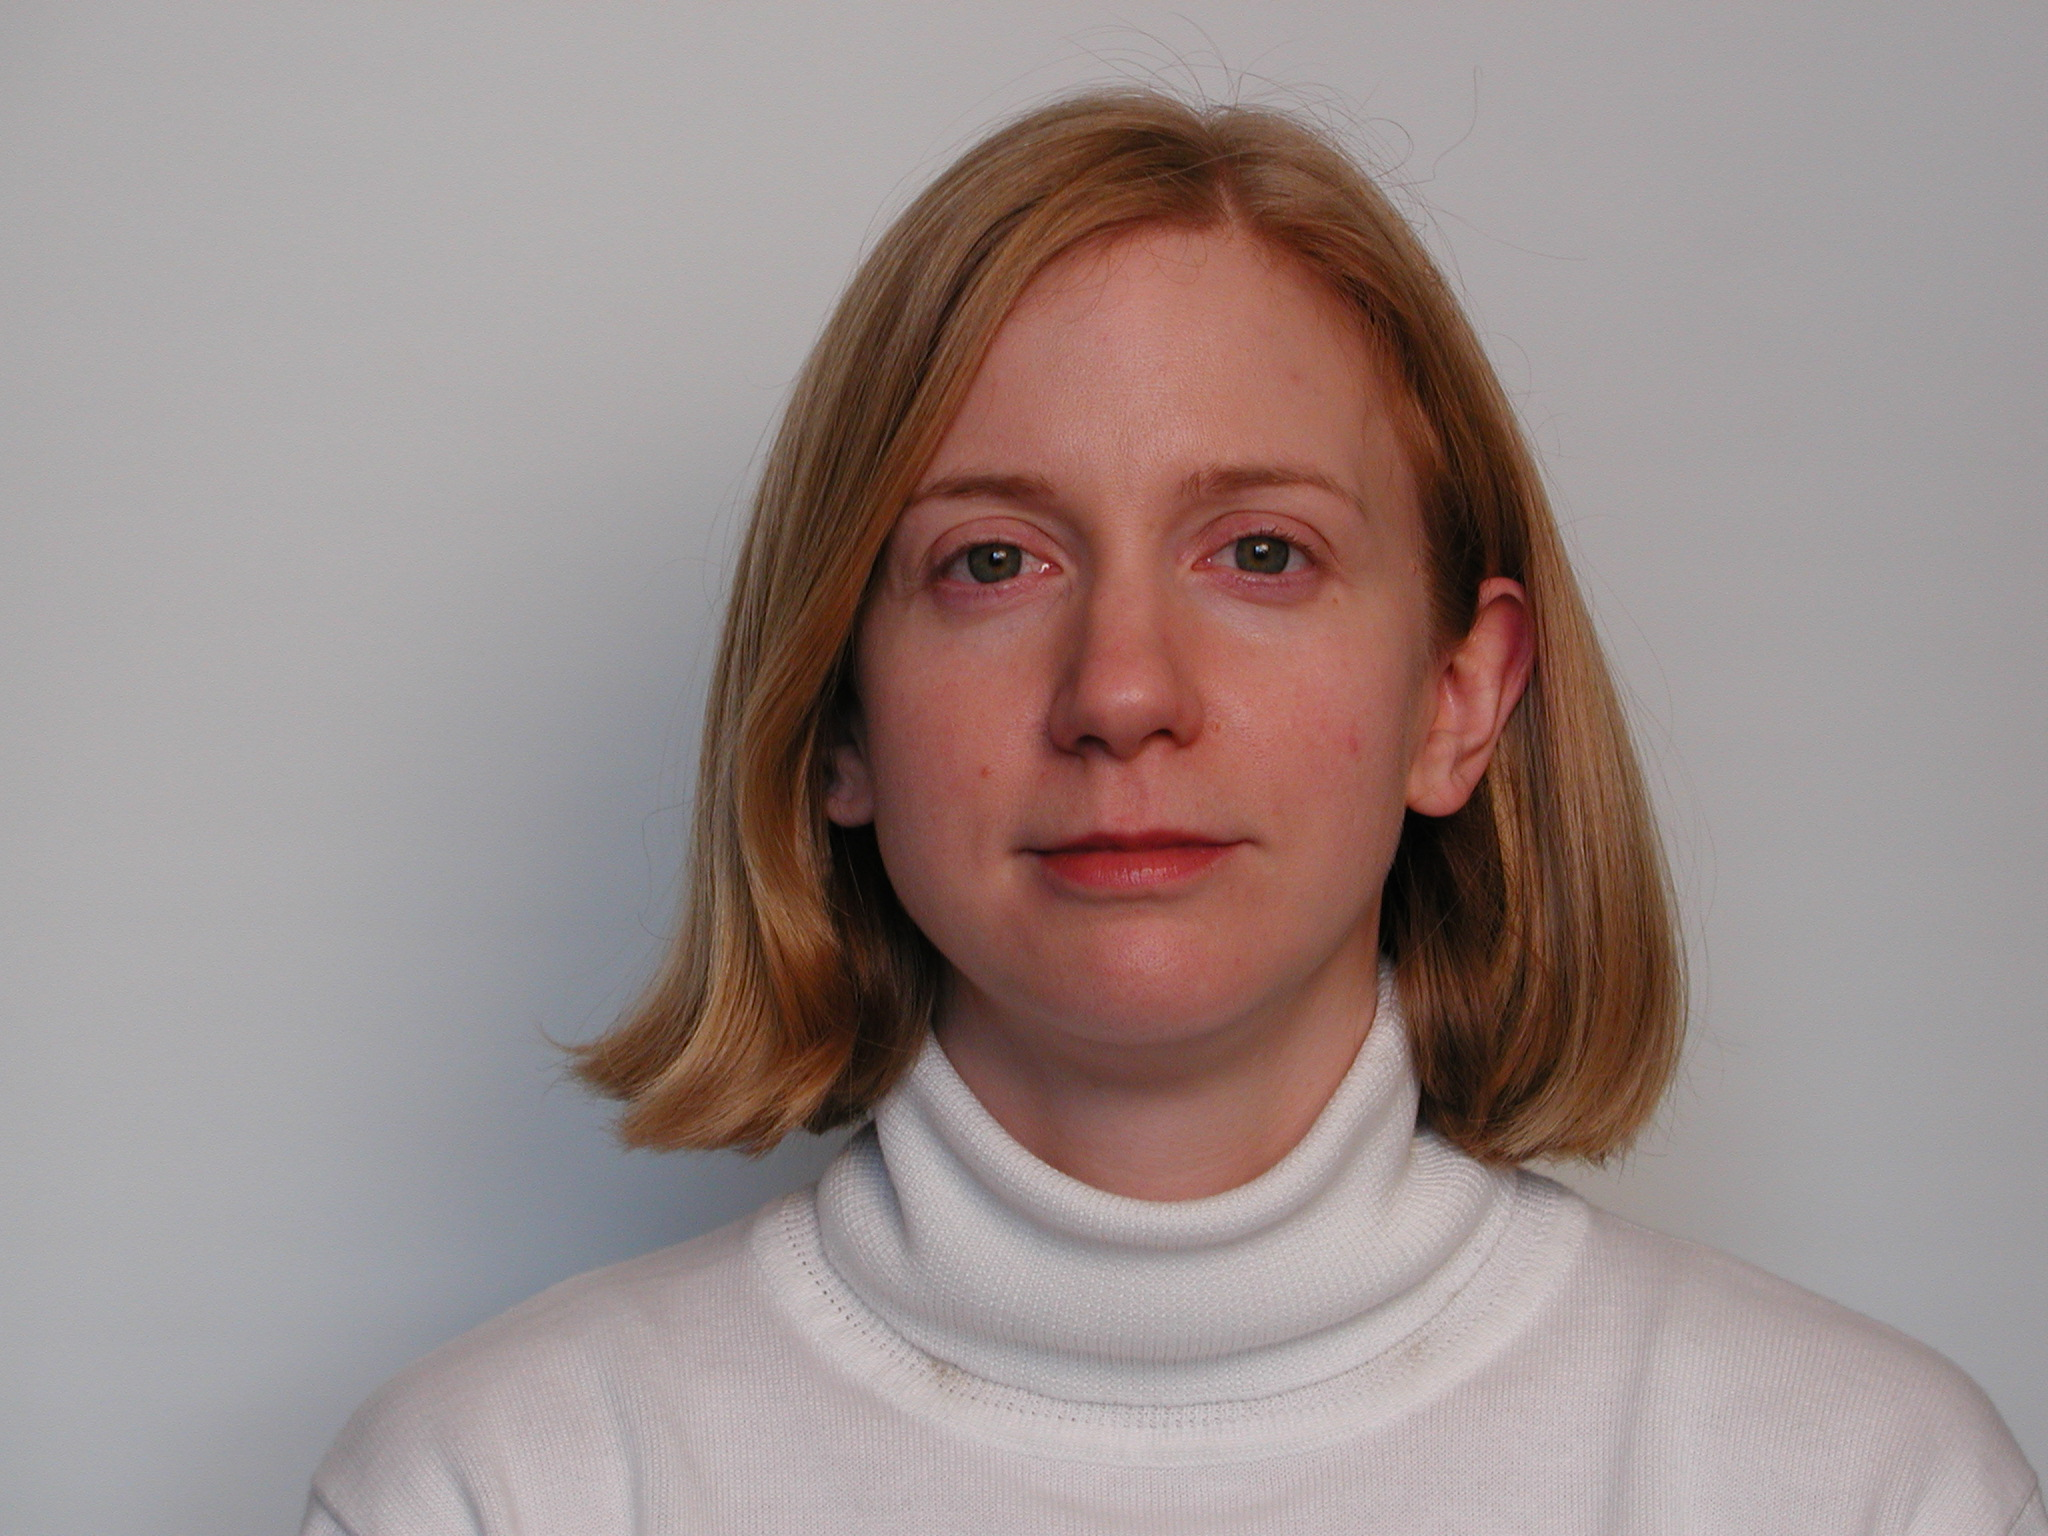

In [3]:
PATH = "/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/"
Image(filename = PATH + "0009_002.jpg", width=300, height=300)

The face recognition library for some reason makes the images BGR (blue-green-red) instead of RGB (red-green-blue), so after we load the file, we're first going to convert the image back to RGB format using OpenCV.

In [4]:
img_bgr = face_recognition.load_image_file("/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/0009_002.jpg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
cv2.imshow('bgr', img_bgr)
cv2.imshow('rgb', img_rgb)
cv2.waitKey(100)

-1

In the code chunk below, we are going to locate the face and draw a boundary around the face (as shown in the image directly below the code chunk).

In [5]:
img_modi_rgb=face_recognition.load_image_file('/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/0009_002.jpg')
img_modi_rgb = cv2.cvtColor(img_modi,cv2.COLOR_BGR2RGB)

#Detect face
face = face_recognition.face_locations(img_modi_rgb)[0]
copy = img_modi_rgb.copy()

#Drawing bounding boxes around face
cv2.rectangle(copy, (face[3], face[0]),(face[1], face[2]), (255,0,255), 6)
cv2.imshow('copy', copy)
cv2.imshow('MODI',img_modi_rgb)
cv2.waitKey(100)

-1

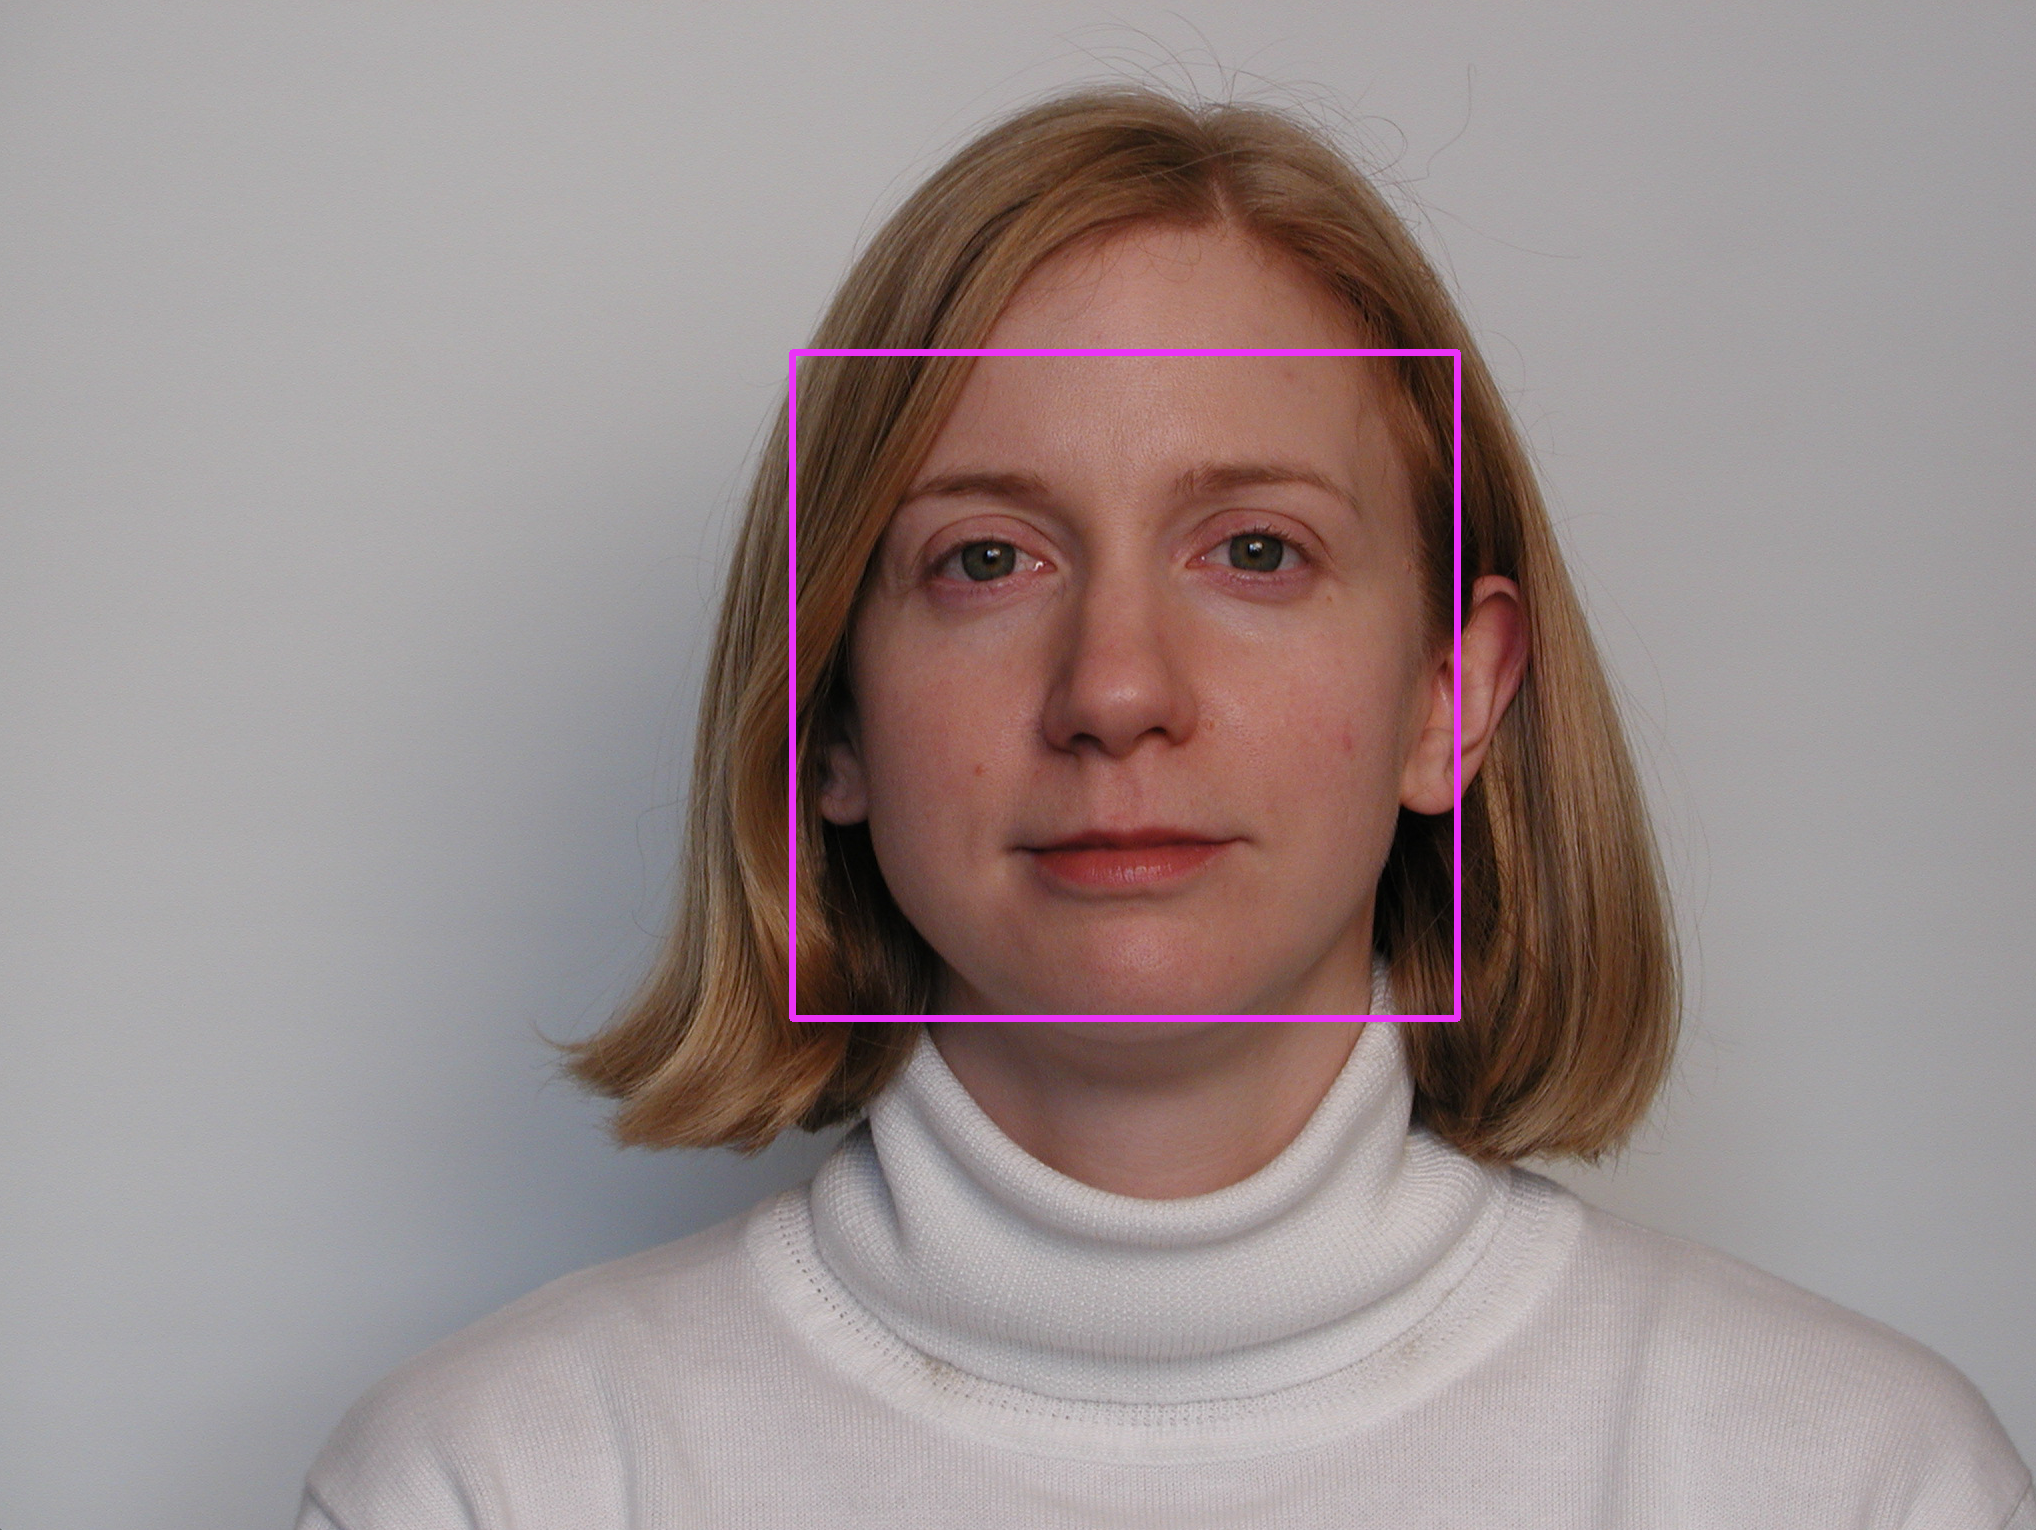

In [9]:
PATH = "/Users/allisonking/Desktop/"
Image(filename = PATH + "face.png", width=300, height=300)

Turning up the heat (ever so slightly), we are now going to test if two different images (one with the same person but a different angle, and the other with a totally different person) match our original image. We start by finding the location of the person's face and then computes the facial encodings in vector representation for the detected face. We then load the test face and compare the test's encodings with the training's encodings.

As we see below, our first image printed "True" as this was indeed an image of the same person. Our second image yielded "False" as our result, as this image was a totally different person. It works!

In [3]:
img_modi=face_recognition.load_image_file('/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/0009_002.jpg')
img_modi_rgb = cv2.cvtColor(img_modi,cv2.COLOR_BGR2RGB)

#Find the face location
face = face_recognition.face_locations(img_modi)[0]

#Convert image into encodings
train_encode = face_recognition.face_encodings(img_modi)[0]

#Test an image
test = face_recognition.load_image_file('/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/0009_005.jpg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
test_encode = face_recognition.face_encodings(test)[0]
print(face_recognition.compare_faces([train_encode],test_encode))
cv2.rectangle(img_modi, (face[3], face[0]),(face[1], face[2]), (255,0,255), 1)
cv2.imshow('img_modi', img_modi)
cv2.waitKey(100)

#Test another image
test1 = face_recognition.load_image_file('/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/0008_003.jpg')
test2 = cv2.cvtColor(test1, cv2.COLOR_BGR2RGB)
test_encode1 = face_recognition.face_encodings(test2)[0]
print(face_recognition.compare_faces([train_encode],test_encode1))
cv2.rectangle(img_modi, (face[3], face[0]),(face[1], face[2]), (255,0,255), 1)
cv2.imshow('img_modi', img_modi)
cv2.waitKey(100)

[True]
[False]


-1

### First Image Tested

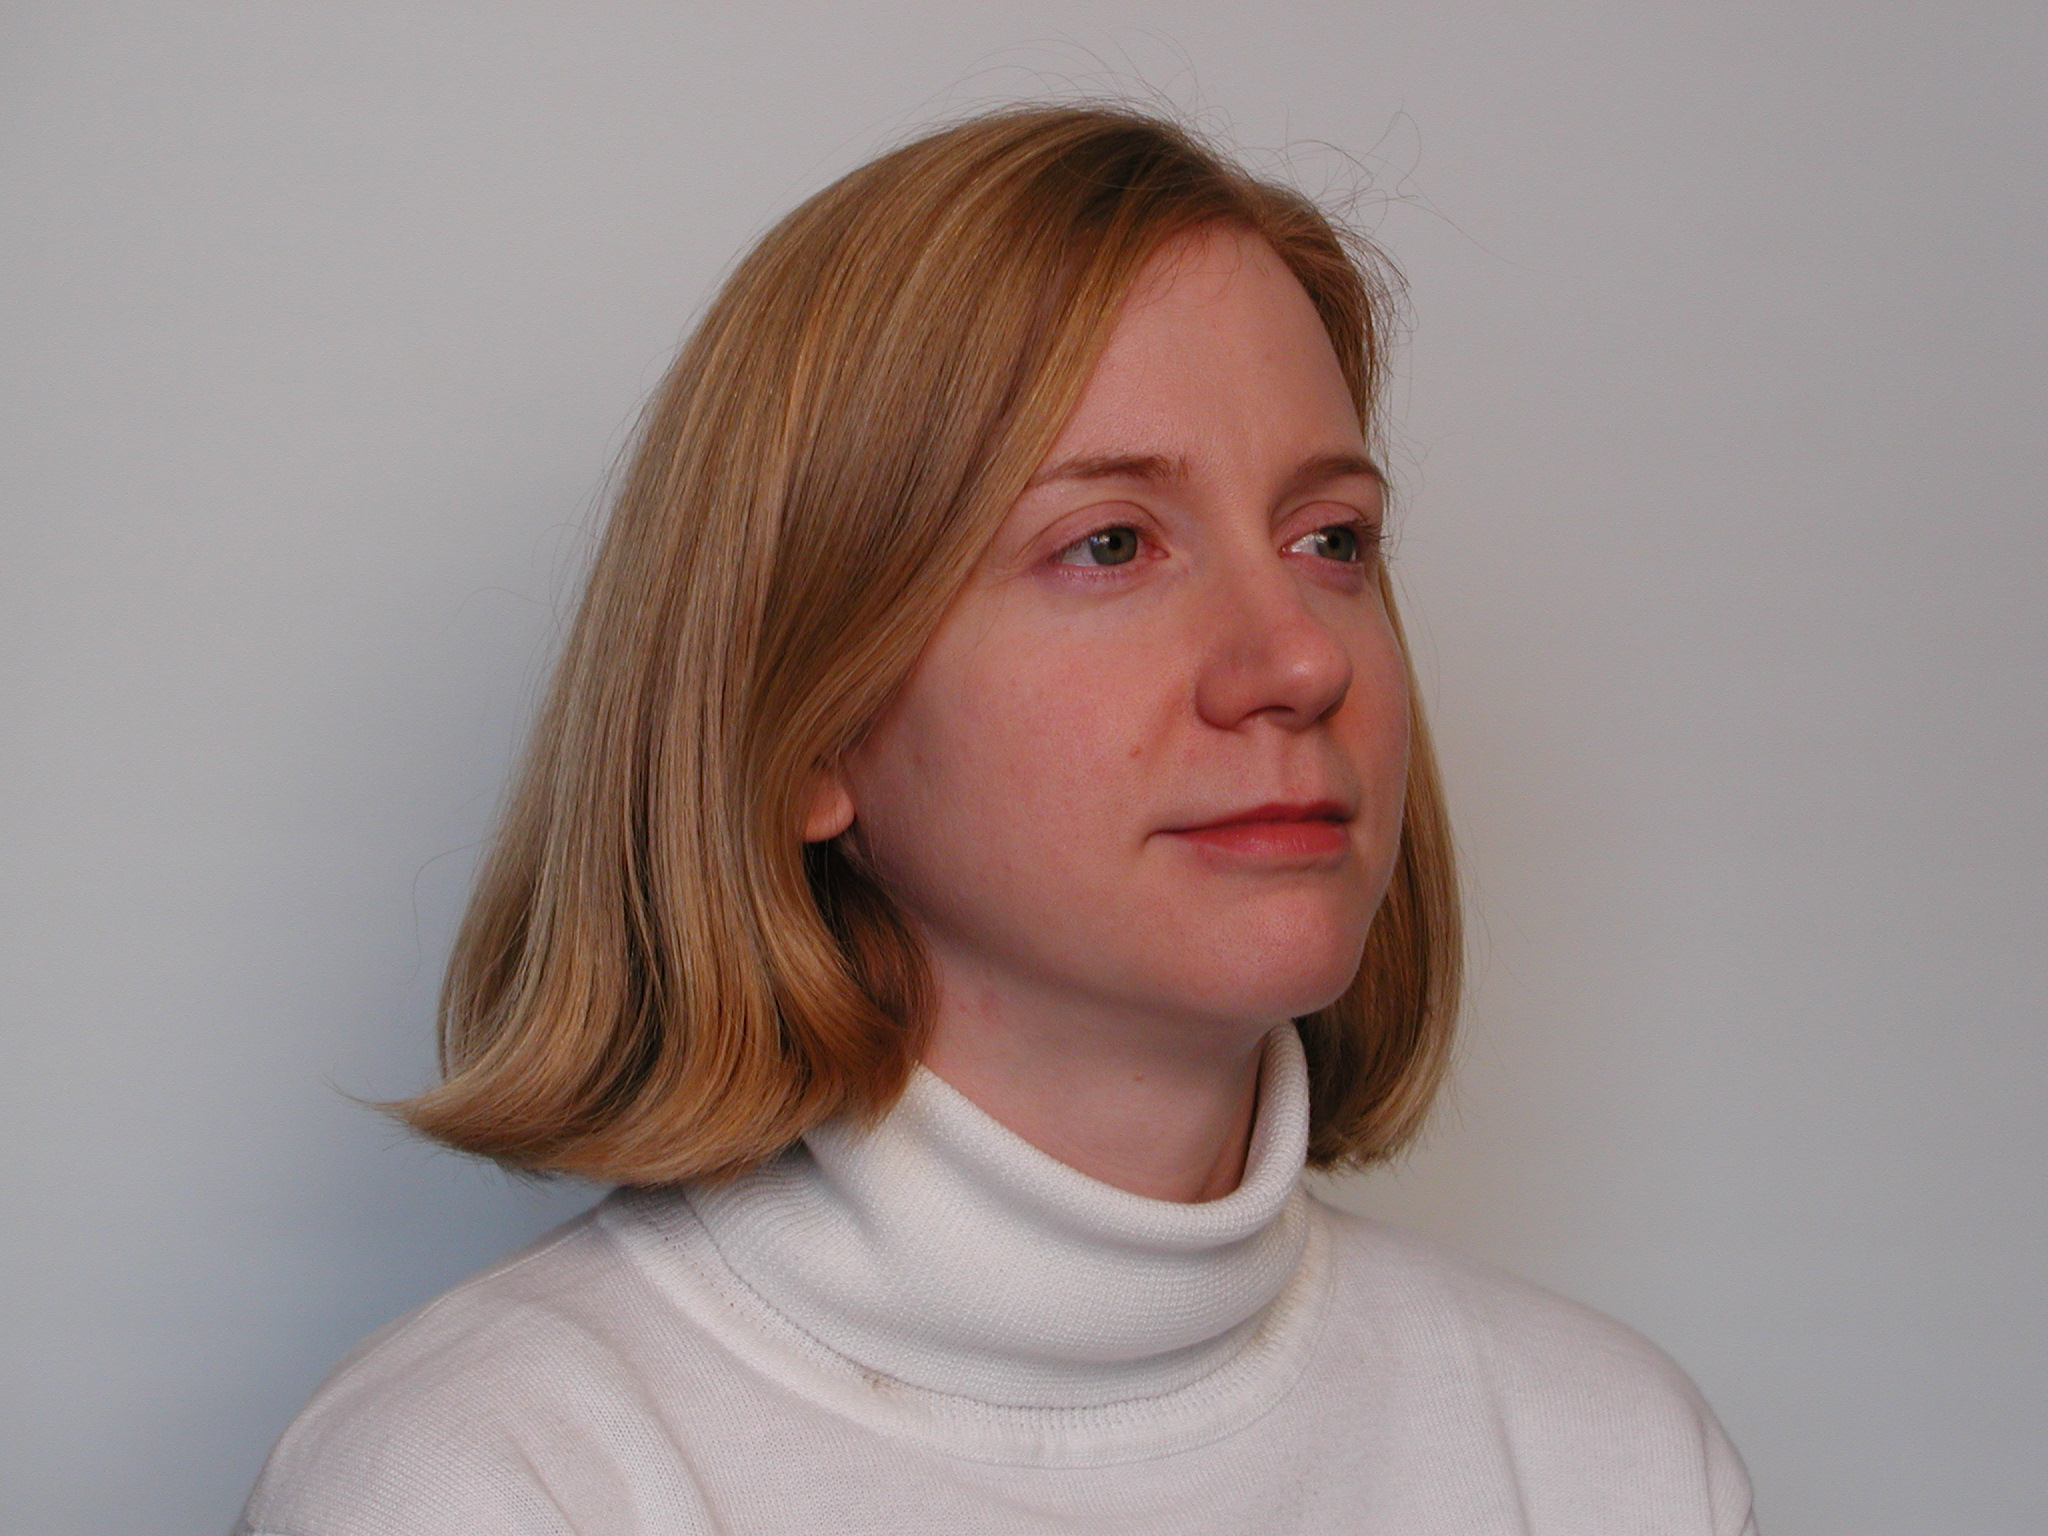

In [3]:
PATH = "/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/"
Image(filename = PATH + "0009_005.jpg", width=300, height=300)

### Second Image Tested

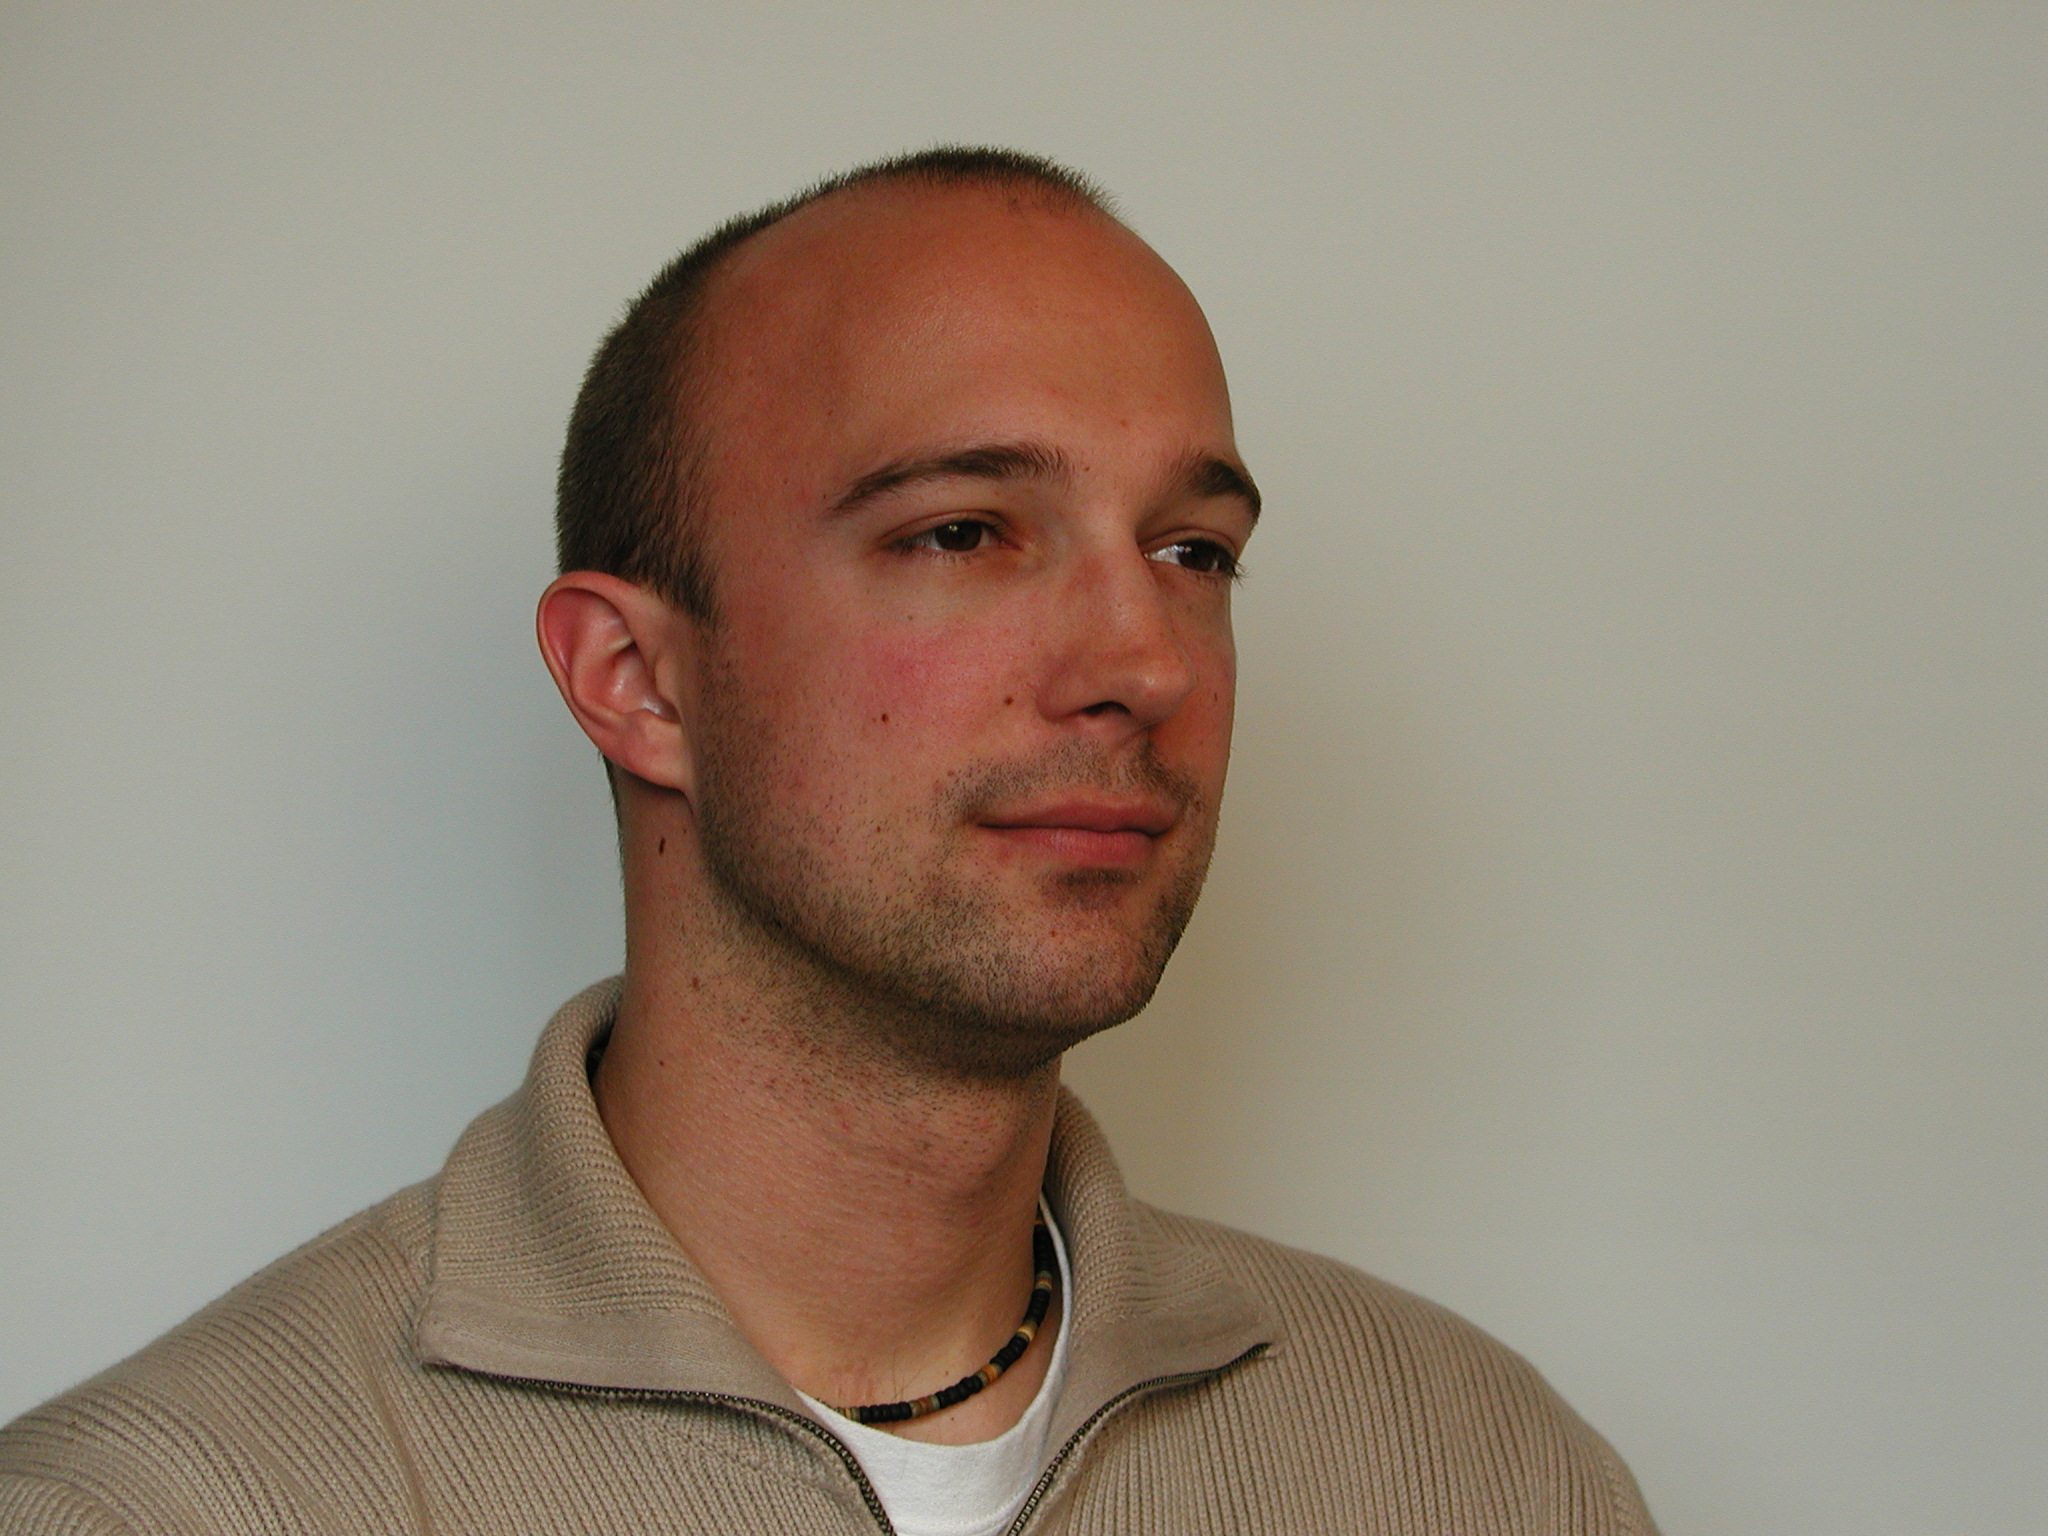

In [4]:
PATH = "/Users/allisonking/Downloads/MIT-CBCL-facerec-database/training-originals/"
Image(filename = PATH + "0008_003.jpg", width=300, height=300)